In [9]:
'''
Case study for paper: Channel degradation of SSMI 
'''


import numpy as np
import pickle
from contextlib import contextmanager
import os
import matplotlib.pyplot as plt
import glob
import datetime

@contextmanager
def cd(newdir):
    prevdir = os.getcwd()
    os.chdir(newdir)
    try:
        yield
    finally:
        os.chdir(prevdir)


ssmi_path = '../SSMI/F13'
with cd(ssmi_path):
    import sensor_info

chan_desc = sensor_info.channel_descriptions
nchans = len(chan_desc)

In [10]:
flist = glob.glob(f'/qdata1/pbrown/transfer/spencer/SSMI_files/F08_*_qc.pkl'); flist.sort()

for i,ifile in enumerate(flist):
    if len(ifile.split('/')[-1].split('_')[1]) > 4: continue
    with open(ifile, 'rb') as f:
        data = pickle.load(f)
    if i == 0:
        datetimes = data['datetimes']
        counts    = data['counts_array']
    else:
        datetimes = np.concatenate((datetimes, data['datetimes']))
        counts    = np.concatenate((counts, data['counts_array']), axis=0)

In [16]:
datetimes

array([datetime.datetime(1987, 7, 9, 12, 55, 14),
       datetime.datetime(1987, 7, 9, 14, 37, 12),
       datetime.datetime(1987, 7, 9, 16, 19, 11), ...,
       datetime.datetime(1991, 12, 30, 16, 44, 55),
       datetime.datetime(1991, 12, 31, 16, 30, 33),
       datetime.datetime(1991, 12, 31, 18, 12, 23)],
      shape=(21010,), dtype=object)

In [18]:
#Apply running mean to make plots nicer
import stats
for ichan in range(nchans):
    counts[:,ichan] = stats.running_mean(counts[:,ichan], window_size=80, method='center', ends='wrap')

In [17]:
16*5

80

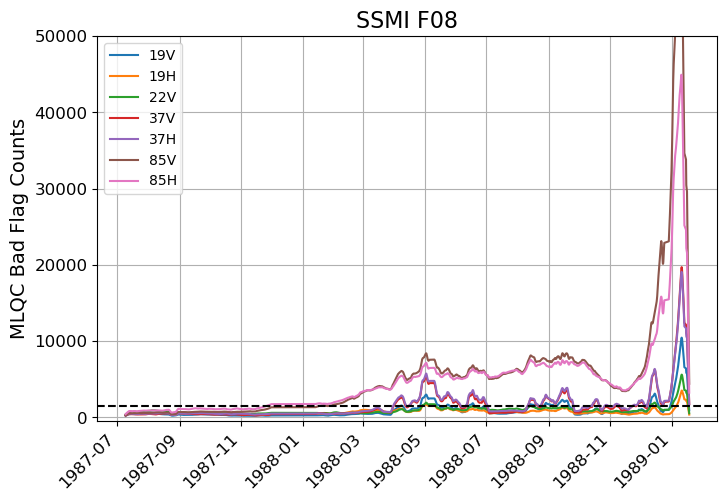

In [19]:
plt.figure(figsize=[8,5])
for ichan in range(nchans):
    if chan_desc[ichan][-1] == 'a': continue
    plt.plot(datetimes[:6907],counts[:6907,ichan], linewidth=1.5,
             label=chan_desc[ichan][:3])
plt.axhline(1500, color='k', linestyle='--')
plt.grid()
plt.ylim(-500,50000)
plt.legend()
plt.ylabel('MLQC Bad Flag Counts', fontsize=14)
plt.title('SSMI F08', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [5]:
flist = glob.glob(f'/qdata1/pbrown/transfer/spencer/SSMI_files_no85/F08_*_qc.pkl'); flist.sort()

for i,ifile in enumerate(flist):
    if len(ifile.split('/')[-1].split('_')[1]) > 4: continue
    with open(ifile, 'rb') as f:
        data = pickle.load(f)
    if i == 0:
        datetimes = data['datetimes']
        counts    = data['counts_array']
    else:
        datetimes = np.concatenate((datetimes, data['datetimes']))
        counts    = np.concatenate((counts, data['counts_array']), axis=0)

In [6]:
#Apply running mean to make plots nicer
import stats
for ichan in range(nchans):
    if ichan >= 5: continue
    counts[9:-8,ichan] = stats.running_mean(counts[:,ichan], window_size=18, method='center')

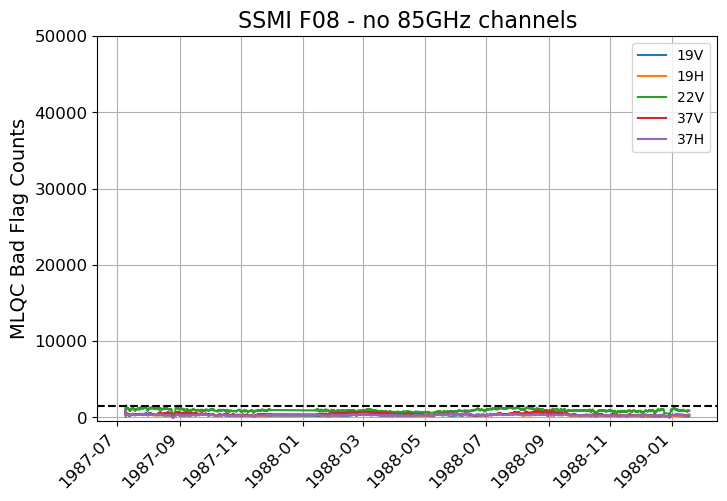

In [7]:
plt.figure(figsize=[8,5])
for ichan in range(nchans):
    if ichan >= 5: continue
    if chan_desc[ichan][-1] == 'a': continue
    plt.plot(datetimes[:6907],counts[:6907,ichan], linewidth=1.5,
             label=chan_desc[ichan][:3])
plt.axhline(1500, color='k', linestyle='--')
plt.grid()
plt.ylim(-500,50000)
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('MLQC Bad Flag Counts', fontsize=14)
plt.title('SSMI F08 - no 85GHz channels', fontsize=16)
plt.show()

In [8]:
datetimes

array([datetime.datetime(1987, 7, 9, 12, 55, 14),
       datetime.datetime(1987, 7, 9, 14, 37, 12),
       datetime.datetime(1987, 7, 9, 16, 19, 11), ...,
       datetime.datetime(1991, 12, 30, 16, 44, 55),
       datetime.datetime(1991, 12, 31, 16, 30, 33),
       datetime.datetime(1991, 12, 31, 18, 12, 23)],
      shape=(21010,), dtype=object)